# Data

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Knowledge Graph based Recommedor

/content/drive/MyDrive/Knowledge Graph based Recommedor


customers
products
orders
order reviews

In [49]:
import pandas as pd
import numpy as np

customers = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/olist_customers_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/olist_products_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/olist_orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/olist_order_items_dataset.csv')
orders = orders.merge(order_items,on='order_id',how='left')
orders = orders.merge(customers[['customer_id','customer_unique_id']],on='customer_id',how='left')
category_map = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/product_category_name_translation.csv')
products = products.merge(category_map,left_on='product_category_name',right_on='product_category_name',how='left')
products.drop(columns='product_category_name',inplace=True)
products.rename(columns={'product_category_name_english':'product_category_name'},inplace=True)
reviews = pd.read_csv('/content/drive/MyDrive/Knowledge Graph based Recommedor/Data/olist_order_reviews_dataset.csv')


In [50]:
print(f'Customer DB columns: {customers.columns}')
print(f'Product DB columns: {products.columns}')
print(f'Orders DB columns: {orders.columns}')
print(f'Reviews DB columns: {reviews.columns}')

Customer DB columns: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Product DB columns: Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name'],
      dtype='object')
Orders DB columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id'],
      dtype='object')
Reviews DB columns: Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='obj

In [58]:
customer_unique_ids = customers['customer_unique_id'].unique()
product_ids = products['product_id'].unique()
order_ids = orders['order_id'].unique()
review_ids = reviews['review_id'].unique()
seller_ids = orders['seller_id'].unique()
print(f'Unique customer_unique_ids: {len(customer_unique_ids)}')
print(f'Unique product_ids: {len(product_ids)}')
print(f'Unique order_ids: {len(order_ids)}')
print(f'Unique review_ids: {len(review_ids)}')
print(f'Unique seller_ids: {len(seller_ids)}')

Unique customer_unique_ids: 96096
Unique product_ids: 32951
Unique order_ids: 99441
Unique review_ids: 98410
Unique seller_ids: 3096


99441

In [55]:
def MapAlphaNumtoNum(unique_ids):
  unique_ids_map = {}
  for i,id in enumerate(unique_ids):
    unique_ids_map[id] = i
  return unique_ids_map

customer_unique_ids_map = MapAlphaNumtoNum(customer_unique_ids)
product_ids_map = MapAlphaNumtoNum(product_ids)
order_ids_map = MapAlphaNumtoNum(order_ids)
review_ids_map = MapAlphaNumtoNum(review_ids)


customers['customer_unique_id'] = customers['customer_unique_id'].map(customer_unique_ids_map)
orders['customer_unique_id'] = orders['customer_unique_id'].map(customer_unique_ids_map)
products['product_id'] = products['product_id'].map(product_ids_map)
orders['order_id'] = orders['order_id'].map(order_ids_map)
reviews['review_id'] = reviews['review_id'].map(review_ids_map)
orders['seller_id'] = orders['seller_id'].map(numseller)

In [56]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,1,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,2,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,4,13056,campinas,SP


In [57]:
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,0,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,1,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,2,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,3,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,4,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [59]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id
0,0,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,0,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff
1,1,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,1,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231
2,2,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8
3,3,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,3,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977
4,4,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,4,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6


In [40]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,47621,44692,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,49619,63412,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,13223,96304,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,88592,39089,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,95219,54600,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
print(f'Customer DB columns: {customers.columns}')
print(f'Product DB columns: {products.columns}')
print(f'Orders DB columns: {orders.columns}')
print(f'Reviews DB columns: {reviews.columns}')

Customer DB columns: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Product DB columns: Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category_name'],
      dtype='object')
Orders DB columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')
Reviews DB columns: Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


# Building a Knowledge Graph

Nodes will represent entities: customers, products, orders, and reviews. \  
Edges will represent relationships: purchases, reviews, and product categorization.

### Mapping Out Relationships

    \ Customer → Order: A customer places an order.
    \ Order → Product: Each order contains one or more products.
    \ Product → Category: Products are organized into categories.
    \ Customer → Review: Customers review products in specific orders.
    \ Review → Product: Each review relates to a specific product.

In [9]:
import pandas as pd
import networkx as nx

G = nx.Graph()

## Adding Nodes

In [10]:
# 1. Customer to Order
for _, row in orders.iterrows():
    G.add_node(row['customer_unique_id'], label='customer')
    G.add_node(row['order_id'], label='order')
    G.add_edge(row['customer_unique_id'], row['order_id'], relationship='placed_order')

print(1)

# 2. Order to Product
for _, row in orders.iterrows():
    G.add_node(row['product_id'], label='product')
    G.add_edge(row['order_id'], row['product_id'], relationship='contains_product')

print(2)

# 3. Order to Review
for _, row in reviews.iterrows():
    G.add_node(row['review_id'], label='review')
    G.add_edge(row['order_id'], row['review_id'], relationship='has_review')

print(3)

# 4. Order to Seller
for _, row in orders.iterrows():
    G.add_node(row['seller_id'], label='seller')
    G.add_edge(row['order_id'], row['seller_id'], relationship='associated_with_seller')

print(4)

# 5. Customer to Location (Zip Code)
for _, row in customers.iterrows():
    G.add_node(row['customer_zip_code_prefix'], label='location')
    G.add_edge(row['customer_unique_id'], row['customer_zip_code_prefix'], relationship='located_at')

print(5)

1
2
3
4


NameError: name 'customer' is not defined

In [30]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.8 MB/s eta 0:00:00


## Visualisation

## Some metrics

In [14]:
avg_degree = sum(dict(G.degree()).values()) / len(G)
connected_components = nx.number_connected_components(G)
avg_shortest_path_length = nx.average_shortest_path_length(G) if nx.is_connected(G) else 'Graph not connected'
print(f"Average Degree: {avg_degree}")
print(f"Number of Connected Components: {connected_components}")
print(f"Average Shortest Path Length: {avg_shortest_path_length}")

Average Degree: 2.878372132413524
Number of Connected Components: 22
Average Shortest Path Length: Graph not connected


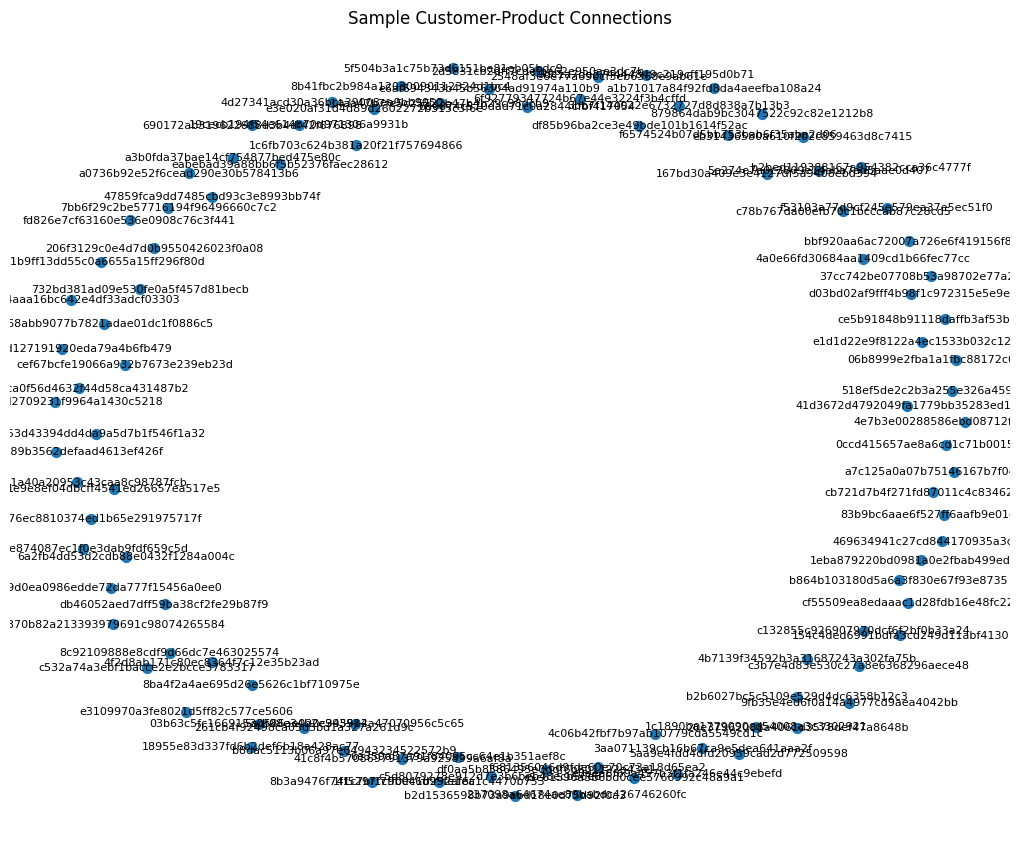

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sample_nodes = list(customers['customer_id'].unique())[:50] + list(products['product_id'].unique())[:50]
subgraph = G.subgraph(sample_nodes)
pos = nx.spring_layout(subgraph, k=0.1)
nx.draw(subgraph, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Sample Customer-Product Connections")
plt.show()

In [23]:
product_nodes = [node for node, data in G.nodes(data=True) if data.get('label') == 'product']
highest_degree_product = max(product_nodes, key=lambda node: G.degree(node))

print(f"Product with the highest degree: {highest_degree_product}")
print(f"Degree: {G.degree(highest_degree_product)}")

# Create a Subgraph for the Highest Degree Product
subgraph_nodes = list(nx.node_connected_component(G, highest_degree_product))
product_subgraph = G.subgraph(subgraph_nodes)

# Plot the Knowledge Graph for the Product with the Highest Degree
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(product_subgraph, k=0.1)
nx.draw(product_subgraph, pos, with_labels=True, node_size=50, font_size=8, node_color='skyblue')
plt.title("Knowledge Graph for Product with Highest Degree")
plt.show()

Product with the highest degree: 99a4788cb24856965c36a24e339b6058
Degree: 467


KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

In [26]:
customer_nodes = [node for node, data in G.nodes(data=True) if data.get('label') == 'customer']
highest_degree_product = max(customer_nodes, key=lambda node: G.degree(node))

print(f"Product with the highest degree: {highest_degree_product}")
print(f"Degree: {G.degree(highest_degree_product)}")

# Create a Subgraph for the Highest Degree Product
subgraph_nodes = list(nx.node_connected_component(G, highest_degree_product))
product_subgraph = G.subgraph(subgraph_nodes)

print(product_subgraph.number_of_edges())

# Plot the Knowledge Graph for the Product with the Highest Degree
# plt.figure(figsize=(10, 8))
# pos = nx.spring_layout(product_subgraph, k=0.1)
# nx.draw(product_subgraph, pos, with_labels=True, node_size=50, font_size=8, node_color='skyblue')
# plt.title("Knowledge Graph for Customer with Highest Degree")
# plt.show()

Product with the highest degree: 9ef432eb6251297304e76186b10a928d
Degree: 2
501211
501316


# GNN based Recommendation System

In [33]:
pip install torch_geometric

  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)


In [44]:
import torch
import torch_geometric
from torch_geometric.nn import GCNConv, SAGEConv
from torch_geometric.data import Data, HeteroData
from torch_geometric.transforms import ToUndirected
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, ndcg_score
import torch.nn.functional as F
from typing import List, Tuple, Dict

# Convert NetworkX graph to PyG data
def convert_nx_to_pyg(G):
    # Create node type mapping
    node_types = {node: G.nodes[node]['label'] for node in G.nodes()}
    unique_types = list(set(node_types.values()))
    type_to_idx = {t: i for i, t in enumerate(unique_types)}

    # Create node type tensors
    node_type_idx = torch.tensor([type_to_idx[node_types[node]] for node in G.nodes()])

    # Create edge index
    edge_index = torch.tensor([[u, v] for u, v in G.edges()]).t()

    # Create node features
    num_nodes = G.number_of_nodes()

    # Create feature vectors based on node types
    node_features = torch.zeros((num_nodes, len(unique_types)))
    for i, node in enumerate(G.nodes()):
        node_features[i, type_to_idx[node_types[node]]] = 1

    # Create edge types
    edge_types = [G.edges[u, v]['relationship'] for u, v in G.edges()]
    unique_edge_types = list(set(edge_types))
    edge_type_idx = torch.tensor([unique_edge_types.index(t) for t in edge_types])

    return Data(
        x=node_features,
        edge_index=edge_index,
        edge_type=edge_type_idx,
        node_type=node_type_idx
    )

# Enhanced GNN model for e-commerce
class EcommerceGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(EcommerceGNN, self).__init__()

        # Multiple GNN layers
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, num_classes)

        # Additional layers for recommendation
        self.product_embedding = torch.nn.Linear(num_classes, hidden_channels)
        self.customer_embedding = torch.nn.Linear(num_classes, hidden_channels)

    def encode(self, x, edge_index):
        # Initial convolutions
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.2, training=self.training)

        return self.conv3(x, edge_index)

    def decode(self, z, edge_label_index, node_type):
        # Get customer and product embeddings
        customer_mask = (node_type == 0)  # Assuming 0 is customer type
        product_mask = (node_type == 2)   # Assuming 2 is product type

        customer_emb = self.customer_embedding(z[customer_mask])
        product_emb = self.product_embedding(z[product_mask])

        # Compute similarity scores
        src, dst = edge_label_index
        return (customer_emb[src] * product_emb[dst]).sum(dim=-1)

    def forward(self, x, edge_index, edge_label_index, node_type):
        z = self.encode(x, edge_index)
        return self.decode(z, edge_label_index, node_type)

# Training function with negative sampling
def train_model(model, data, optimizer, epochs=100):
    model.train()

    # Training loop
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Generate negative samples (customers with products they haven't bought)
        customer_nodes = torch.where(data.node_type == 0)[0]
        product_nodes = torch.where(data.node_type == 2)[0]

        # Positive edges (actual purchases)
        pos_edge_index = data.edge_index[:, data.edge_type == 1]  # Assuming 1 is purchase relationship

        # Generate negative edges
        num_neg_samples = pos_edge_index.size(1)
        neg_edge_index = torch.stack([
            customer_nodes[torch.randint(0, len(customer_nodes), (num_neg_samples,))],
            product_nodes[torch.randint(0, len(product_nodes), (num_neg_samples,))]
        ])

        edge_label_index = torch.cat([pos_edge_index, neg_edge_index], dim=1)
        edge_label = torch.cat([
            torch.ones(pos_edge_index.size(1)),
            torch.zeros(neg_edge_index.size(1))
        ])

        # Forward pass
        out = model(data.x, data.edge_index, edge_label_index, data.node_type)
        loss = F.binary_cross_entropy_with_logits(out, edge_label)

        # Backward pass
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1:03d}, Loss: {loss.item():.4f}')

    return losses

# Function to get top-N product recommendations for a customer
def get_recommendations(model, data, customer_id, n=5):
    model.eval()

    with torch.no_grad():
        # Get customer node index
        customer_idx = torch.where(data.node_type == 0)[0][customer_id]
        product_nodes = torch.where(data.node_type == 2)[0]

        # Create edges between customer and all products
        edge_label_index = torch.stack([
            torch.full_like(product_nodes, customer_idx),
            product_nodes
        ])

        # Get prediction scores
        scores = model(data.x, data.edge_index, edge_label_index, data.node_type)
        scores = torch.sigmoid(scores)

        # Get top N products
        top_scores, top_indices = torch.topk(scores, n)
        recommended_products = product_nodes[top_indices]

        return recommended_products.numpy(), top_scores.numpy()

# Visualization function for recommendations
def visualize_recommendations(G, customer_id, recommended_products, scores):
    plt.figure(figsize=(12, 8))

    # Create subgraph
    relevant_nodes = [customer_id] + recommended_products.tolist()
    subG = G.subgraph(relevant_nodes)

    pos = nx.spring_layout(subG)

    # Draw nodes
    nx.draw_networkx_nodes(subG, pos,
                          node_color=['lightblue' if n == customer_id else 'lightgreen'
                                    for n in subG.nodes()],
                          node_size=1000)

    # Draw edges
    nx.draw_networkx_edges(subG, pos)

    # Add labels
    labels = {n: f"Product {i}\n{score:.2f}" if n != customer_id else f"Customer {customer_id}"
             for i, (n, score) in enumerate(zip(recommended_products, scores))}
    nx.draw_networkx_labels(subG, pos, labels)

    plt.title(f"Top Product Recommendations for Customer {customer_id}")
    plt.axis('off')
    plt.show()

# Main execution
def main(G):
    # Convert graph to PyG format
    data = convert_nx_to_pyg(G)

    # Initialize model
    num_features = data.x.size(1)
    model = EcommerceGNN(num_features=num_features,
                        hidden_channels=64,
                        num_classes=32)

    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Train model
    losses = train_model(model, data, optimizer)

    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Get recommendations for a sample customer
    customer_id = 0  # Replace with actual customer ID
    recommended_products, scores = get_recommendations(model, data, customer_id)

    # Visualize recommendations
    visualize_recommendations(G, customer_id, recommended_products, scores)

    return model, data

def split_edges(data: Data,
                val_ratio: float = 0.1,
                test_ratio: float = 0.2) -> Tuple[Data, List[torch.Tensor]]:
    """
    Split customer-product interactions into train/val/test sets
    """
    # Get customer-product purchase edges
    customer_mask = data.node_type == 0
    product_mask = data.node_type == 2
    purchase_mask = data.edge_type == 1  # Assuming 1 is purchase relationship

    purchase_edges = data.edge_index[:, purchase_mask]
    num_edges = purchase_edges.size(1)

    # Create random indices for splitting
    perm = torch.randperm(num_edges)
    test_size = int(num_edges * test_ratio)
    val_size = int(num_edges * val_ratio)

    # Split indices
    test_indices = perm[:test_size]
    val_indices = perm[test_size:test_size + val_size]
    train_indices = perm[test_size + val_size:]

    # Create edge sets
    train_edges = purchase_edges[:, train_indices]
    val_edges = purchase_edges[:, val_indices]
    test_edges = purchase_edges[:, test_indices]

    # Create negative samples for validation and test
    def sample_neg_edges(pos_edges: torch.Tensor,
                        num_nodes: int,
                        num_neg: int) -> torch.Tensor:
        neg_edges = torch.randint(0, num_nodes, (2, num_neg), dtype=torch.long)
        # Ensure source nodes are customers and target nodes are products
        neg_edges[0] = torch.where(customer_mask)[0][neg_edges[0] % customer_mask.sum()]
        neg_edges[1] = torch.where(product_mask)[0][neg_edges[1] % product_mask.sum()]
        return neg_edges

    val_neg_edges = sample_neg_edges(val_edges, data.num_nodes, val_edges.size(1))
    test_neg_edges = sample_neg_edges(test_edges, data.num_nodes, test_edges.size(1))

    # Update the graph with only training edges
    mask = torch.ones(data.edge_index.size(1), dtype=torch.bool)
    mask[test_indices] = False
    mask[val_indices] = False

    train_data = Data(
        x=data.x,
        edge_index=data.edge_index[:, mask],
        edge_type=data.edge_type[mask],
        node_type=data.node_type
    )

    return train_data, (
        train_edges,
        val_edges,
        test_edges,
        val_neg_edges,
        test_neg_edges
    )

class MetricsTracker:
    """Track and store various recommendation metrics"""
    def __init__(self):
        self.train_losses = []
        self.val_metrics = {'auc': [], 'ndcg': [], 'precision': [], 'recall': []}
        self.test_metrics = {'auc': [], 'ndcg': [], 'precision': [], 'recall': []}

    def update_train(self, loss: float):
        self.train_losses.append(loss)

    def update_validation(self, metrics: Dict[str, float]):
        for k, v in metrics.items():
            self.val_metrics[k].append(v)

    def update_test(self, metrics: Dict[str, float]):
        for k, v in metrics.items():
            self.test_metrics[k].append(v)

    def plot_metrics(self):
        """Plot training loss and validation metrics"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Plot training loss
        ax1.plot(self.train_losses)
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')

        # Plot validation metrics
        for metric_name, values in self.val_metrics.items():
            ax2.plot(values, label=metric_name)
        ax2.set_title('Validation Metrics')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Score')
        ax2.legend()

        plt.tight_layout()
        plt.show()

def evaluate(model: torch.nn.Module,
            data: Data,
            pos_edges: torch.Tensor,
            neg_edges: torch.Tensor) -> Dict[str, float]:
    """
    Evaluate model performance using multiple metrics
    """
    model.eval()
    with torch.no_grad():
        # Get predictions for positive and negative edges
        pos_pred = model(data.x, data.edge_index, pos_edges, data.node_type)
        neg_pred = model(data.x, data.edge_index, neg_edges, data.node_type)

        # Combine predictions and true labels
        pred = torch.cat([pos_pred, neg_pred])
        pred_proba = torch.sigmoid(pred)
        true_labels = torch.cat([torch.ones(pos_edges.size(1)),
                               torch.zeros(neg_edges.size(1))])

        # Calculate metrics
        metrics = {
            'auc': roc_auc_score(true_labels.cpu(), pred_proba.cpu()),
            'ndcg': ndcg_score(true_labels.cpu().reshape(1, -1),
                              pred_proba.cpu().reshape(1, -1)),
            'precision': precision_score(true_labels.cpu(),
                                      (pred_proba > 0.5).cpu().float()),
            'recall': recall_score(true_labels.cpu(),
                                 (pred_proba > 0.5).cpu().float())
        }

        return metrics

def train_model(model: torch.nn.Module,
                data: Data,
                split_edges: Tuple[torch.Tensor, ...],
                optimizer: torch.optim.Optimizer,
                epochs: int = 100) -> MetricsTracker:
    """
    Train model with validation
    """
    train_edges, val_edges, _, val_neg_edges, _ = split_edges
    metrics_tracker = MetricsTracker()

    best_val_auc = 0
    best_model_state = None

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()

        # Generate negative samples for training
        train_neg_edges = sample_neg_edges(train_edges, data.num_nodes, train_edges.size(1))

        # Combine positive and negative edges
        edge_label_index = torch.cat([train_edges, train_neg_edges], dim=1)
        edge_label = torch.cat([
            torch.ones(train_edges.size(1)),
            torch.zeros(train_neg_edges.size(1))
        ])

        # Forward pass
        out = model(data.x, data.edge_index, edge_label_index, data.node_type)
        loss = F.binary_cross_entropy_with_logits(out, edge_label)

        # Backward pass
        loss.backward()
        optimizer.step()

        metrics_tracker.update_train(loss.item())

        # Validation
        if (epoch + 1) % 5 == 0:
            val_metrics = evaluate(model, data, val_edges, val_neg_edges)
            metrics_tracker.update_validation(val_metrics)

            # Save best model
            if val_metrics['auc'] > best_val_auc:
                best_val_auc = val_metrics['auc']
                best_model_state = model.state_dict()

            print(f'Epoch {epoch+1:03d}, Loss: {loss.item():.4f}, '
                  f'Val AUC: {val_metrics["auc"]:.4f}, '
                  f'Val NDCG: {val_metrics["ndcg"]:.4f}')

    # Restore best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return metrics_tracker

def main(G):
    # Convert graph to PyG format
    data = convert_nx_to_pyg(G)

    # Split edges
    train_data, split_edges = split_edges(data)

    # Initialize model
    num_features = data.x.size(1)
    model = EcommerceGNN(num_features=num_features,
                        hidden_channels=64,
                        num_classes=32)

    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Train model
    metrics_tracker = train_model(model, train_data, split_edges, optimizer)

    # Plot metrics
    metrics_tracker.plot_metrics()

    # Final evaluation on test set
    _, _, test_edges, _, test_neg_edges = split_edges
    test_metrics = evaluate(model, train_data, test_edges, test_neg_edges)
    print("\nFinal Test Metrics:")
    for metric_name, value in test_metrics.items():
        print(f"{metric_name.upper()}: {value:.4f}")

    return model, train_data, metrics_tracker

# Function to get recommendations with confidence scores
def get_top_n_recommendations(model: torch.nn.Module,
                            data: Data,
                            customer_id: int,
                            n: int = 5,
                            exclude_purchased: bool = True) -> Tuple[np.ndarray, np.ndarray]:
    """
    Get top-N product recommendations for a customer with confidence scores
    """
    model.eval()

    with torch.no_grad():
        # Get all products
        product_nodes = torch.where(data.node_type == 2)[0]

        # Create edges between customer and all products
        edge_label_index = torch.stack([
            torch.full_like(product_nodes, customer_id),
            product_nodes
        ])

        # Get prediction scores
        scores = model(data.x, data.edge_index, edge_label_index, data.node_type)
        scores = torch.sigmoid(scores)

        if exclude_purchased:
            # Get already purchased products
            purchased_mask = torch.zeros_like(scores, dtype=torch.bool)
            for i in range(data.edge_index.size(1)):
                if (data.edge_index[0, i] == customer_id and
                    data.edge_type[i] == 1):  # purchase relationship
                    product_idx = torch.where(product_nodes == data.edge_index[1, i])[0]
                    if len(product_idx) > 0:
                        purchased_mask[product_idx] = True

            # Set scores of purchased products to -inf
            scores[purchased_mask] = float('-inf')

        # Get top N products
        top_scores, top_indices = torch.topk(scores, min(n, len(scores)))
        recommended_products = product_nodes[top_indices]

        return recommended_products.numpy(), top_scores.numpy()


In [45]:
model, train_data, metrics_tracker = main(G)

ValueError: too many dimensions 'str'